In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
import pandas as pd
import numpy as np

In [53]:
data=pd.read_csv("E:\Python\PracticleData\data2.txt",names=['area','bedroom','price'])

In [54]:
data.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [55]:
data=(data-data.mean())/data.std()

In [56]:
data.head()

,area,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [57]:
#defining the method of Linear Regression
def computeCost(X,y,theta):
    inner=np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [58]:
"""#adding two more columns in dataframea
sqr_of_area=pd.Series([]) 
sqr_of_bedroom=pd.Series([])
for i in range(len(data)):
    sqr_of_area[i]=data['area'][i]**2
    sqr_of_bedroom[i]=data['bedroom'][i]**2
data.insert(2,'sqr of area',sqr_of_area)
data.insert(4,'sqr of bedroom',sqr_of_bedroom)
#data.drop(columns='sqr of bedroom')"""

#how to plot any degree polynomial
degree = 2
x1 = data['area']
x2 = data['bedroom']
for i in range(0,degree+1):
    for j in range(0,degree+1):
        if (i+j>0 and i+j<degree+1):
            data['F'+str(i)+str(j)] = np.power(x1,i)*np.power(x2,j)

In [59]:
data.head()

,area,bedroom,price,F01,F02,F10,F11,F20
0,0.130010,-0.223675,0.475747,-0.223675,0.050031,0.130010,-0.029080,0.016903
1,-0.504190,-0.223675,-0.084074,-0.223675,0.050031,-0.504190,0.112775,0.254207
2,0.502476,-0.223675,0.228626,-0.223675,0.050031,0.502476,-0.112391,0.252482
3,-0.735723,-1.537767,-0.867025,-1.537767,2.364727,-0.735723,1.131371,0.541288
4,1.257476,1.090417,1.595389,1.090417,1.189008,1.257476,1.371173,1.581246


In [60]:
#drop column area and bedroom as we got it as F01 and F10
data=data.drop('area',axis=1)
data=data.drop('bedroom',axis=1)

In [61]:
data.head()

,price,F01,F02,F10,F11,F20
0,0.475747,-0.223675,0.050031,0.130010,-0.029080,0.016903
1,-0.084074,-0.223675,0.050031,-0.504190,0.112775,0.254207
2,0.228626,-0.223675,0.050031,0.502476,-0.112391,0.252482
3,-0.867025,-1.537767,2.364727,-0.735723,1.131371,0.541288
4,1.595389,1.090417,1.189008,1.257476,1.371173,1.581246


In [62]:
data.insert(1,'ones',1) ##0->column no.,  ones->new clmn name,   1->clmn value
type(data)

pandas.core.frame.DataFrame

In [63]:
data.head()

,price,ones,F01,F02,F10,F11,F20
0,0.475747,1,-0.223675,0.050031,0.130010,-0.029080,0.016903
1,-0.084074,1,-0.223675,0.050031,-0.504190,0.112775,0.254207
2,0.228626,1,-0.223675,0.050031,0.502476,-0.112391,0.252482
3,-0.867025,1,-1.537767,2.364727,-0.735723,1.131371,0.541288
4,1.595389,1,1.090417,1.189008,1.257476,1.371173,1.581246


In [73]:
##puttting value in X and y
X=data.iloc[:,1:7]
y=data.iloc[:,0:1]

In [74]:
## converting dataframes into matrix
X=np.matrix(X)
y=np.matrix(y)
theta=np.matrix(np.zeros((1,6))) 
#theta=np.matrix(np.ones((1,6))) as per requirement from In[111] line 3 

In [75]:
np.shape(X),np.shape(y),np.shape(theta),theta

((47, 6), (47, 1), (1, 6), matrix([[0., 0., 0., 0., 0., 0.]]))

In [76]:
c=computeCost(X,y,theta)

In [77]:
c

0.48936170212765967

In [78]:
def gradientDescent(X,y,theta,alpha, iterations):
    temp = np.matrix(np.zeros((1,6)))
    parameters = 6  #theta0,theta1,theta2
    cost = np.zeros(iterations) #error of every iteration
    for i in range(iterations):
        error = (X*theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j]) 
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta) 
    return theta,cost

In [88]:
#a,b=gradientDescent(X,y,theta,0.1,10)
#changing the values of alpha to checking the cost (must be decreases)
a,b=gradientDescent(X,y,theta,0.0001,100000)
#now change the theta values from zeroes to smthing but 
#it will not change a'(as we got minimum of a at alpha=0.01 and iter=10000 ) 

In [90]:
a,"\t",b   

(matrix([[ 0.04444959, -0.06551788, -0.09545666,  0.87212419,  0.13800265,
          -0.03832883]]),
 '\t',
 array([0.48913704, 0.48891263, 0.48868847, ..., 0.12378315, 0.12378307,
        0.12378299]))

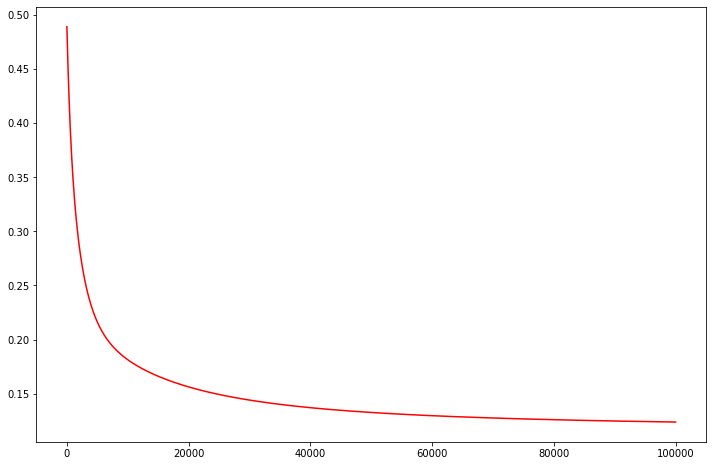

In [91]:
fig,ax = plt.subplots(figsize=(12,8))                          
x=np.arange(100000)
y=b
ax.plot(x,y,'r')                                                  
#ax.scatter(b, np.arange(100000))                       